# Covid 19 - Lecon #2

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_row',111)
pd.set_option('display.max_column',111)
data = pd.read_excel('dataset.xlsx')
df = data.copy()

## On commence par nettoyer les données
avec les cellules qui ont plus de 90% de valeurs manquantes

In [90]:
# on supprime les colonnes avec trop de données manquantes
#df = df[df.columns[df.isna().sum()/df.shape[0] <0.9]]
# on supprime la colonne du Patient ID
#df = df.drop('Patient ID',axis=1)
#df.shape

In [91]:
# positif = df[df['SARS-Cov-2 exam result'] == 'positive']
# negatif = df[df['SARS-Cov-2 exam result'] == 'negative']

### On ne va garder que les colonnes significatives

In [92]:
missing_rate = df.isna().sum()/df.shape[0] 
blood = list(df.columns[(missing_rate<0.9) & (missing_rate>0.88)])
viral = list(df.columns[(missing_rate<0.80) & (missing_rate>0.75)])
key_columns = ['Patient age quantile', 'SARS-Cov-2 exam result' ]
df = df[key_columns + blood + viral]
df.head()
# print(key_columns+blood+viral)

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2
0,13,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,negative,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected
2,8,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected


## Train

<AxesSubplot:ylabel='SARS-Cov-2 exam result'>

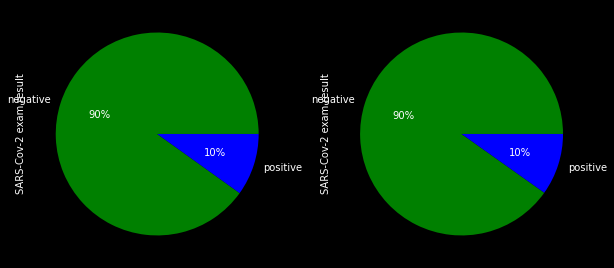

In [93]:
from sklearn.model_selection import train_test_split
trainset, testset = train_test_split(df,test_size=0.2,random_state=0)
plt.figure(figsize=(10,7))
plt.subplot(121)
trainset['SARS-Cov-2 exam result'].value_counts().plot.pie(colors=['g','b'],autopct='%.0f%%')
plt.subplot(122)
testset['SARS-Cov-2 exam result'].value_counts().plot.pie(colors=['g','b'],autopct='%.0f%%')

## Preprocessing

In [94]:
# encodage
def encodage(df):
    code = {'positive':1, 'negative':0, 'detected':1, 'not_detected':0}
    for col in df.select_dtypes('object').columns:
        df.loc[:,col] = df[col].map(code)
    return df

In [95]:
def imputation(df):
    # df = df.fillna(-999)
    df = df.dropna(axis=0)
    return df

In [96]:
def feature_engineering(df):
    # code = { True: 1, False: 0}
    df['malade'] =  df[viral].sum(axis=1) >= 1
    # df0.loc[:,'malade'] = df0['malade'].map(code)
    df = df.drop(viral,axis=1)
    return df

In [97]:
def preprocessing(df0):
    df0 = encodage(df0)
    df0 = feature_engineering(df0)
    df0 = imputation(df0)

    X = df0.drop('SARS-Cov-2 exam result',axis=1)
    y = df0['SARS-Cov-2 exam result']

    print(y.value_counts())
    return X,y

In [98]:
X_train, y_train = preprocessing(trainset)
X_train

0    422
1     65
Name: SARS-Cov-2 exam result, dtype: int64


,Patient age quantile,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),malade
543,18,1.358055,1.356092,-0.228491,-0.438097,1.142196,-0.517481,0.244149,0.275501,-0.223767,0.178175,-0.793368,0.066045,0.987864,-0.005877,False
203,9,1.174947,0.854844,-1.019885,-1.784415,0.824849,-0.193377,-0.851210,-0.317234,-0.223767,-0.083183,1.608576,0.366488,0.042388,-0.448160,True
1624,10,1.037616,1.481403,-1.823841,0.347255,1.142196,0.966573,1.837398,-1.135374,-0.223767,0.387261,-0.835508,-0.454724,-0.377823,-0.978899,False
500,6,-0.038148,0.165628,0.914633,0.122869,-0.515058,1.316264,0.841616,0.044529,0.998070,1.275878,0.133698,1.007433,-0.456613,-0.801985,False
34,17,0.808730,1.042812,-0.278739,1.581381,0.701437,-0.261609,1.040773,0.000005,0.387152,0.439533,0.049419,-0.014074,-0.509139,-0.094334,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3299,19,0.785841,0.666876,1.366858,1.693575,0.119635,2.638266,-0.253742,1.486016,0.081693,0.909977,0.133698,1.147641,-1.008140,-0.801985,False
5251,0,-2.533002,-2.465924,3.037579,-0.774677,-2.348615,3.167067,-0.452899,1.764295,-1.140144,-0.030911,-0.835508,0.206251,-1.008140,-0.005877,True
1071,4,0.694287,0.729532,-0.140559,-1.447836,0.419350,1.145683,0.343725,-0.553771,1.914447,0.439533,0.217977,0.346459,1.303022,-0.713529,True
4484,4,1.541164,1.669372,1.090499,-0.213711,1.829779,-1.182746,0.742040,1.792123,-1.140144,-0.396813,-0.835508,-0.835285,0.042388,0.878687,True


In [99]:
X_test, y_test = preprocessing(testset)

0    95
1    16
Name: SARS-Cov-2 exam result, dtype: int64


<AxesSubplot:ylabel='SARS-Cov-2 exam result'>

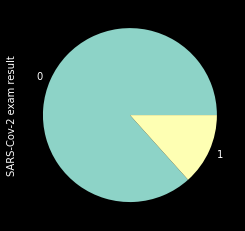

In [100]:
y_train.value_counts().plot.pie()

## Model de base

In [101]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

model = make_pipeline( PolynomialFeatures(2),SelectKBest(f_classif,k=10), RandomForestClassifier(random_state=0))

# model = make_pipeline( SelectKBest(f_classif,k=4), RandomForestClassifier(random_state=0))
model_1 = DecisionTreeClassifier(random_state=0)

## Evaluation

In [102]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [107]:
def evaluation(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))

    N, train_score, val_score = learning_curve(model,X_train,y_train,cv=4,train_sizes=np.linspace(0.1,1,10),scoring='f1')
    plt.figure(figsize=(12,8))
    plt.plot(N,train_score.mean(axis=1),c='b')
    plt.plot(N,val_score.mean(axis=1),c='y')

[[86  9]
 [ 9  7]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        95
           1       0.44      0.44      0.44        16

    accuracy                           0.84       111
   macro avg       0.67      0.67      0.67       111
weighted avg       0.84      0.84      0.84       111



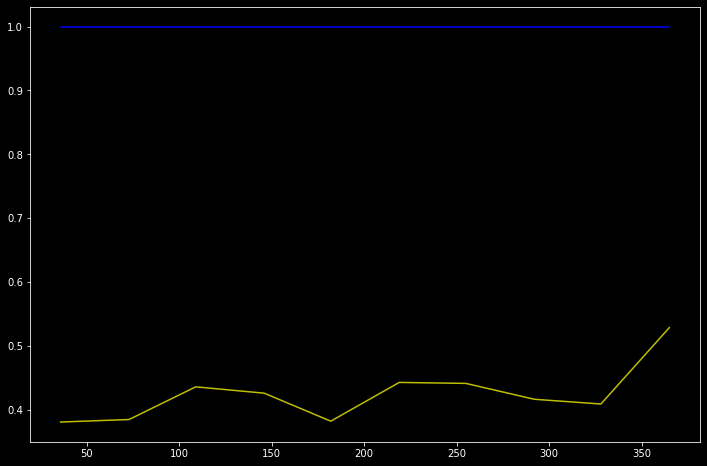

In [108]:
evaluation(model_1) 

<AxesSubplot:>

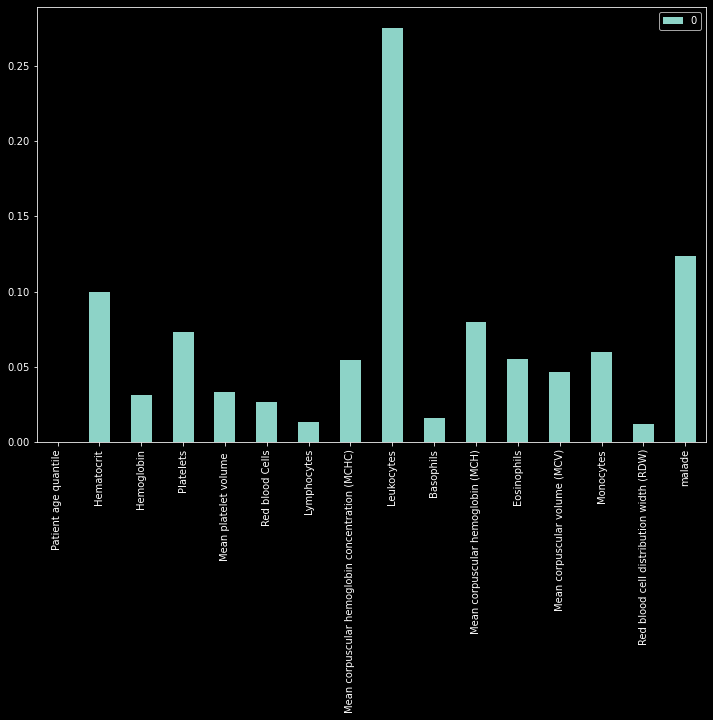

In [109]:
pd.DataFrame(model_1.feature_importances_,index=X_train.columns).plot.bar(figsize=(12,8))

/Users/rky/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/rky/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/rky/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/rky/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/rky/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features

[[91  4]
 [11  5]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        95
           1       0.56      0.31      0.40        16

    accuracy                           0.86       111
   macro avg       0.72      0.64      0.66       111
weighted avg       0.84      0.86      0.85       111



/Users/rky/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/rky/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/rky/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/rky/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/Users/rky/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features

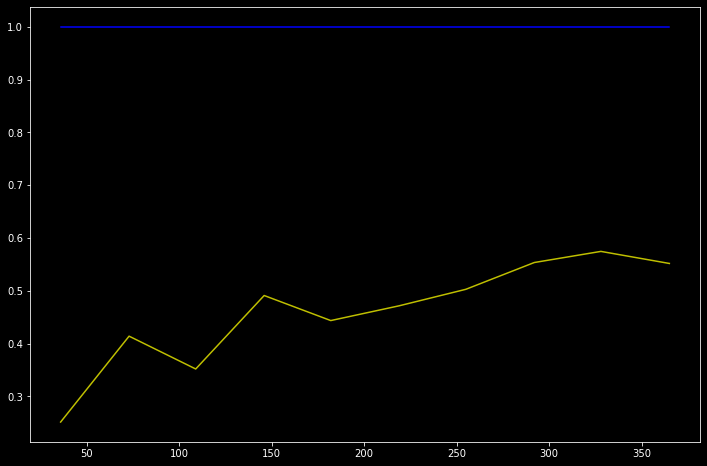

In [110]:
evaluation(model)